In [3]:
import os
import tempfile

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers


In [4]:
import h5py

print(tf.version.VERSION)

2.1.0


In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[0:1000]

train_images_flat = train_images[0:1000].reshape(-1, 28*28)/255.0
test_images_flat = test_images[0:1000].reshape(-1, 28*28)/255.0

In [6]:
from PIL import Image

train_images[16].shape

(28, 28)

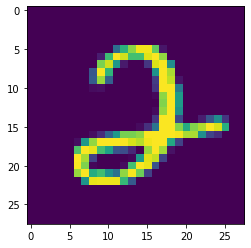

In [7]:
img = Image.fromarray(train_images[16])
plt.imshow(img)

In [8]:
# 定义一个简单的序列模型
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512,activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ])
    model.compile(
        optimizer='adam',
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model

# 创建一个基本的模型实例
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
#===================================================================#
### 创建一个只在训练期间保存权重的 tf.keras.callbacks.ModelCheckpoint 回调：
#===================================================================#
checkpoint_path = "training_1/cp.ckpt"
checkpoin_dir = os.path.dirname(checkpoint_path)

# 创建一个保存模型权重的回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)
# 使用新的回调训练模型
model.fit(train_images_flat,
          train_labels,
          epochs=10,
          validation_data=(test_images_flat, test_labels),
          callbacks=[cp_callback]) # 通过回调训练


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 832/1000 [=======================>......] - ETA: 0s - loss: 1.3006 - accuracy: 0.6202     
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 3s 3ms/sample - loss: 1.1916 - accuracy: 0.6550 - val_loss: 0.7717 - val_accuracy: 0.7680
Epoch 2/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.8810

In [10]:
model2 = create_model()
loss, acc = model2.evaluate(test_images_flat, test_labels, verbose=2)
print("Untrained model2, accuracy is: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 2.3297 - accuracy: 0.1390
Untrained model2, accuracy is: 13.90%


In [11]:
# 加载之前保存的checkpoint中的权重
model2.load_weights(checkpoint_path)

loss, acc = model2.evaluate(test_images_flat, test_labels, verbose=2)
print("restored model, accuracy is : {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 0.4369 - accuracy: 0.8670
restored model, accuracy is : 86.70%


In [12]:
# checkpoint 回调选项

# 在文件名中 使用包含参数 epoch 来保存不同epoch更新后的参数
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 创建一个回调，每 5 个epochs 保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5
)

# 创建一个新的模型实例
model3 = create_model()

# 使用 checkpoint_path 格式保存权重
model3.save_weights(checkpoint_path.format(epoch=0))

# 使用新的回调训练模型
model3.fit(
    train_images_flat,
    train_labels,
    epochs=50,
    callbacks=[cp_callback],
    validation_data=(test_images_flat, test_labels),
    verbose=1
)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1403 - accuracy: 0.6910 - val_loss: 0.7203 - val_accuracy: 0.7810
Epoch 2/50
1000/1000 [==============================] - 1s 662us/sample - loss: 0.4175 - accuracy: 0.8900 - val_loss: 0.5128 - val_accuracy: 0.8420

In [13]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2\\cp-0050.ckpt'

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5724706620631689091
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2247006617
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2544994480658064583
physical_device_desc: "device: 0, name: GeForce GTX 970M, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [15]:
tf.executing_eagerly()

True

In [18]:
x = [[2,2]]
y = [[1,2,3],
     [2,3,4]]
m = tf.matmul(x,y)
print("hello, {}".format(m))

hello, [[ 6 10 14]]
